# 01 - Read TEC Data

Notebook para cargar los datos usando las funciones de `data_utils.py` y mostrar algunas estadisticas

In [1]:
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path 
import logging

import data_utils

# Set logging
logger = logging.getLogger()
logger.setLevel(logging.WARN)

In [2]:
from data_utils import load_tec_data

# Load Data
datafolder = Path("tucu")

years = range(2000, 2024)
data = {}
for year in years:
    print(year)
    try:
        data[year] = load_tec_data(year, datafolder)
    except FileNotFoundError as e:
        print(e, f"{year} not found.")


2000
2001
empty CSV tucu/tucuF3_246.01A has no data
empty CSV tucu/tucuF3_247.01A has no data
empty CSV tucu/tucuF3_248.01A has no data
2002
2003
2004
2005
2006
No files found for year 2006. 2006 not found.
2007
No files found for year 2007. 2007 not found.
2008
No files found for year 2008. 2008 not found.
2009
No files found for year 2009. 2009 not found.
2010
No files found for year 2010. 2010 not found.
2011
No files found for year 2011. 2011 not found.
2012
No files found for year 2012. 2012 not found.
2013
No files found for year 2013. 2013 not found.
2014
No files found for year 2014. 2014 not found.
2015
No files found for year 2015. 2015 not found.
2016
No files found for year 2016. 2016 not found.
2017
2018
No files found for year 2018. 2018 not found.
2019
No files found for year 2019. 2019 not found.
2020
No files found for year 2020. 2020 not found.
2021
No files found for year 2021. 2021 not found.
2022
No files found for year 2022. 2022 not found.
2023
No files found for

Total size: 527040
Number of NaNs: 3706
Real Values: 523334
Porcentage of NaNs: 0.703%
Days Covered: 366
Total size: 524160
Number of NaNs: 215627
Real Values: 308533
Porcentage of NaNs: 41.138%
Days Covered: 364
Total size: 475200
Number of NaNs: 255732
Real Values: 219468
Porcentage of NaNs: 53.816%
Days Covered: 330
Total size: 524160
Number of NaNs: 35795
Real Values: 488365
Porcentage of NaNs: 6.829%
Days Covered: 364
Total size: 525600
Number of NaNs: 95854
Real Values: 429746
Porcentage of NaNs: 18.237%
Days Covered: 365
Total size: 522720
Number of NaNs: 280850
Real Values: 241870
Porcentage of NaNs: 53.729%
Days Covered: 363
Total size: 216000
Number of NaNs: 18844
Real Values: 197156
Porcentage of NaNs: 8.724%
Days Covered: 150


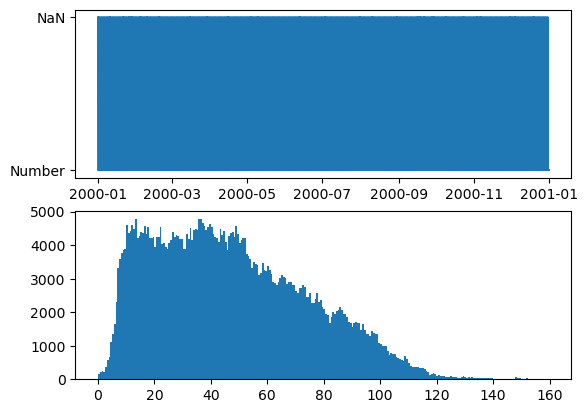

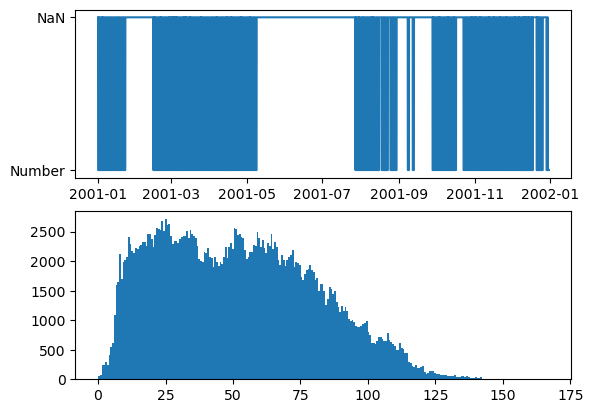

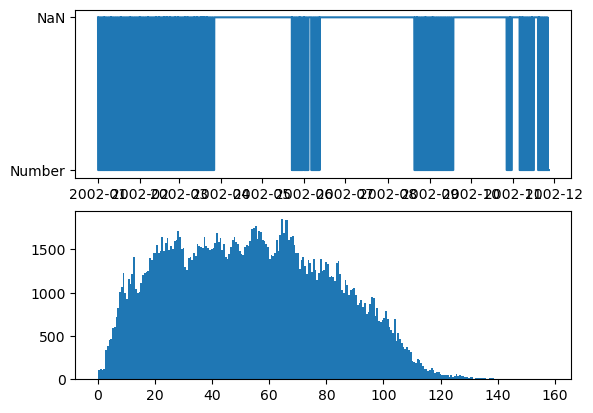

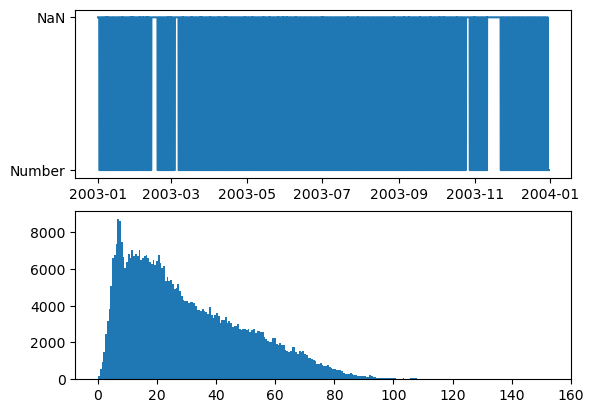

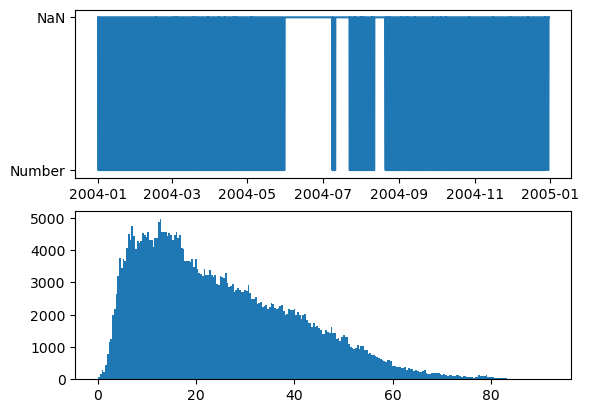

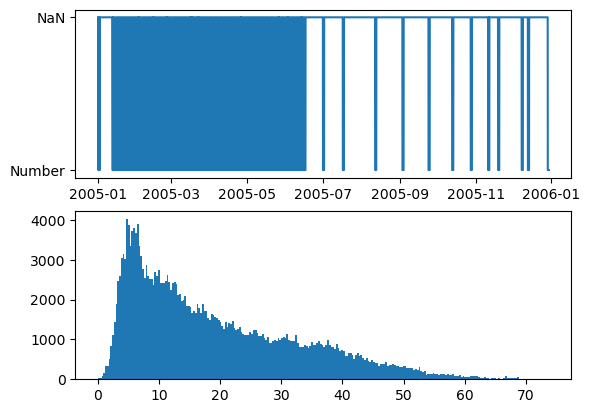

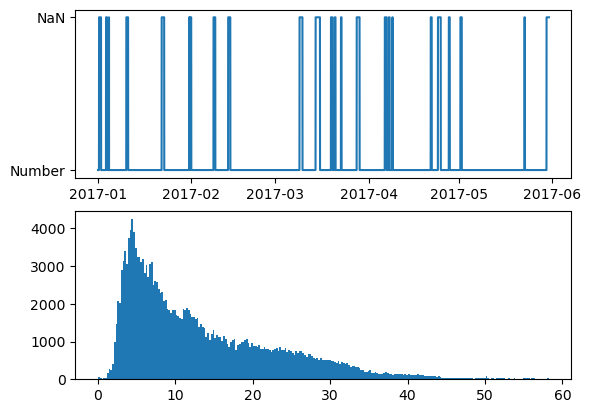

In [26]:
from datetime import timedelta

for year, df in data.items():
    #print(year)
    df = data_utils.TECDataFrame(df.resample(timedelta(seconds=60)).asfreq())
    #hist, ax = df.hist_nan(figsize=(8, 4))
    #ax.set_title(f"Year {year}")
    df.plot_basic_stats()

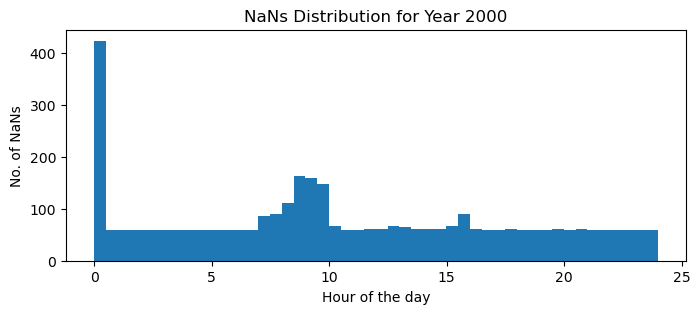

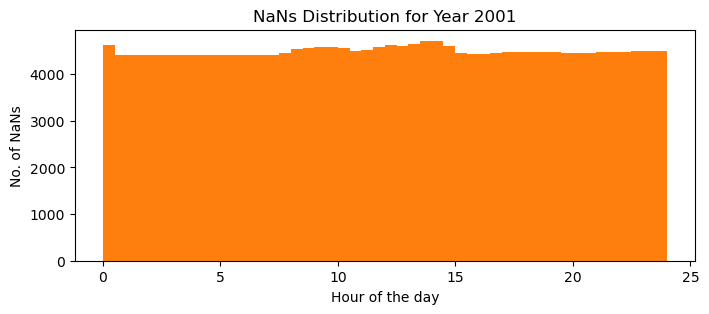

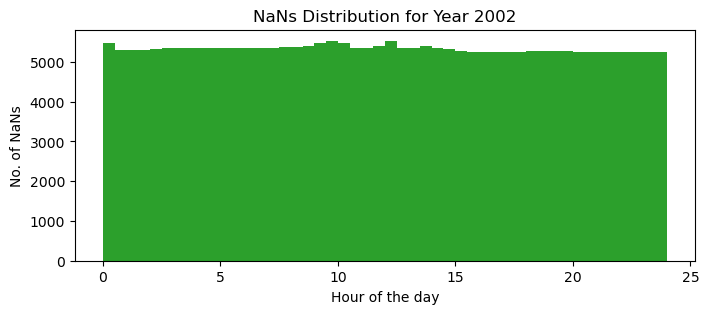

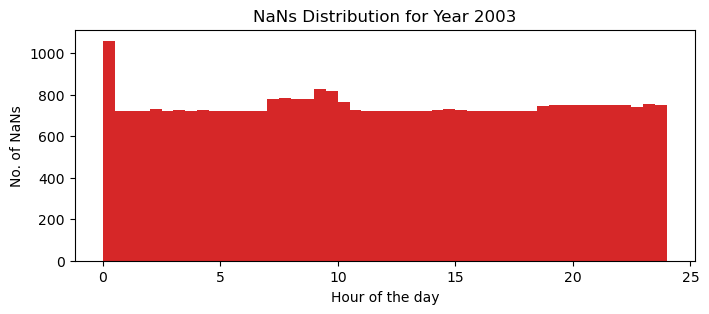

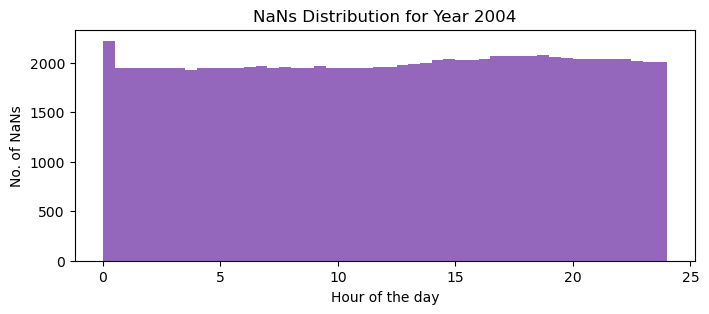

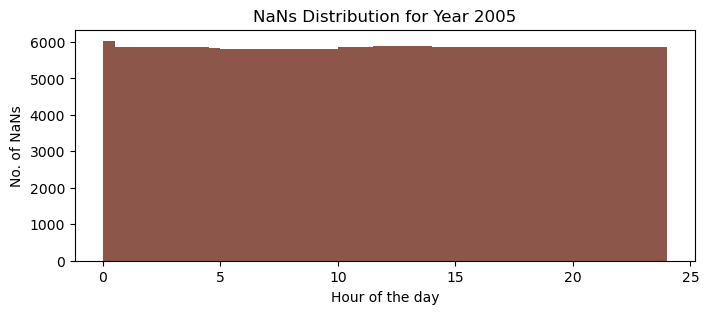

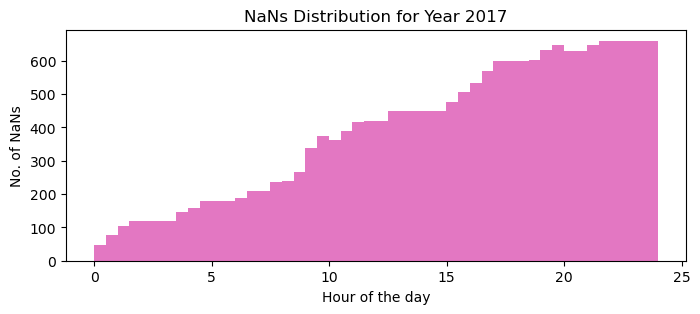

In [5]:
from datetime import timedelta
colors = sns.color_palette()
for i, (year, df) in enumerate(data.items()):
    #print(year)
    df = data_utils.TECDataFrame(df.resample(timedelta(seconds=60)).asfreq())
    hist, ax = df.hist_nan(figsize=(8, 3), color=colors[i])
    ax.set_title(f"NaNs Distribution for Year {year}")
    #df.plot_basic_stats()

In [7]:
from datetime import timedelta
n_nan = []
years = []
days_covered = []
nan_porcentage = []
for year, df in data.items():
    nan_porcentage.append(df.n_nan/len(df.df))
    n_nan.append(df.n_nan)
    years.append(year)
    days_covered.append(df.days_covered)
    
data_nan_stats = pd.DataFrame({"year" : years, "n_nan" : n_nan, "nan_porcentage" : nan_porcentage, "days_covered" : days_covered})

Text(0, 0.5, 'Days Covered')

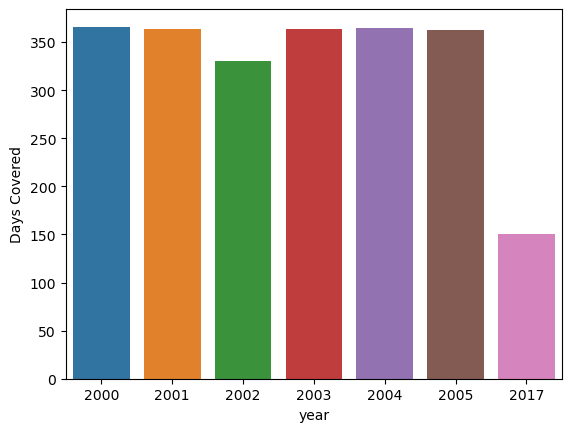

In [8]:
import seaborn as sns 


ax = sns.barplot(data_nan_stats, x="year", y="days_covered")
ax.set_ylabel("Days Covered")
#data_nan_stats.


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

## Load 2017 and 2000 Data

In [ ]:
da

In [2]:
from data_utils import load_tec_data

# Load Data
datafolder = Path("tucu")
df_2017 = load_tec_data(2017, datafolder)
#df_2000 = load_tec_data(2000, datafolder)

In [4]:
type(df_2017.iloc[10:100]), type(df_2017)

(pandas.core.frame.DataFrame, data_utils.TECDataFrame)

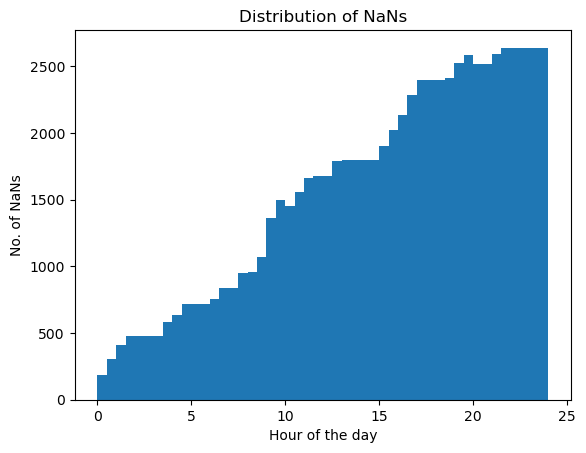

In [ ]:
hist, ax = df_2000.nan_distro()

Total size: 864000
Number of NaNs: 75405
Real Values: 788595
Porcentage of NaNs: 8.727%
Days Covered: 150


array([<Axes: >, <Axes: >], dtype=object)

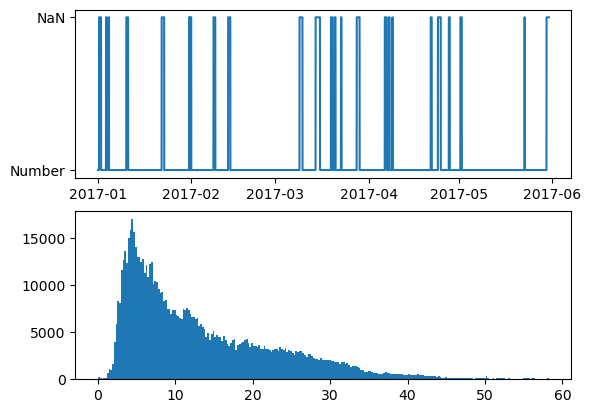

In [4]:
df_2017.plot_basic_stats()

In [12]:
for dir in df_2000.to_pandas_df().__dir__():
    if "html" in dir:
        print(dir)

_repr_html_
to_html


In [94]:
from typing import Any


class A:
    def __init__(self, a, b):
        self.a = a 
        self.b = b 
    def sumar(self):
        return self.a+self.b 
    
    def __getitem__(self, index):
        if index == 0:
            return self.a
        if index == 1:
            return self.b 
        raise IndexError
    
class B:
    def __init__(self, a, b):
        self.a = A(a, b)

    def __getattr__(self, name: str) -> Any:
        return getattr(self.a, name)
    
    def restar(self):
        return self.a.a - self.a.b
    
    def __getitem__(self, index):
        return self.a[index]


b = B(1, 5)
print(b.sumar(), b.restar())
b[0]

6 -4


1

In [5]:
from dataclasses import dataclass

@dataclass
class Stats:
    coverage: int
    nan_porcentage: float
    freq: timedelta

def create_stats(df : pd.DataFrame) -> Stats:

    if not isinstance(df.index, pd.core.indexes.datetimes.DatetimeIndex):
        raise ValueError(f"index of DataFrame must be of type DatetimeIndex")
    
    N = len(df)
    n_nan = df.isna().sum()
    days_covered = df.index.day_of_year.nunique()

    nan_ratio = n_nan / series.size

Stats(1, 0.1, timedelta(1))


Stats(coverage=1, nan_porcentage=0.1, freq=datetime.timedelta(days=1))